# AI based resource scaling

## Case scenario

You and your team have been assigned to a project. The business idea is to reduce carbon footprint by saving resources. Your initial investigation shows, that majority of applications that are deployed on Cloud have high and low traffic hours, but the resources are set to support the peak times. That means there are hours when the allocated resources to the application are not utilized.

You want to develop a model which will allow automatic scaling of these resources. For that purpose, your machine learning model should correctly predict the CPU usage.

## Data

The extract of the data for a sample application was provided to you. In the `data` folder you will find 2 files: `train.csv` and `test.csv`. You should conduct your exploration and model building on the `train.csv` file.
Once you are happy with the model, use the `test.csv` file to predict the `cpu_usage`. You should store your predictions in a new csv file which will be called `<your_name>.csv`. The new file should have the following attributes:
- `id` column
- `timestamp` column
- `cpu_usage` column which should hold your predictions

### Data explanation

- `id` - identifier of the record
- `timestamp` - timestamp in the format YYYY-MM-DD HH-MM-SS
- `number_of_requests` - number of requests the application received in the given time
- `number_of_errors` - number of errors that the application logged in the given time
- `response_time` - cummulative time the application took to respond to a request, in miliseconds
- `cpu_cores` - number of CPU cores allocated to the application at a given time (maximum 8 are available)
- `memory_usage` - memory allocation in a given time, in percent
- `cpu_usage` - cpu allocation in a given time, in percent

## Your delivery

At the end of the day, you should provide us with your code in which you demonstrate that you followed these steps:
1. Data load
2. Data cleaning
3. Data Exploration
4. Data Modeling and validation
5. Prediction

The submission should be done as a pull request (PR) on github to this repository. **Please use branch with your name (not main branch)**. The PR should contain the `<your_name>.csv` file stored in the `data` folder and your code stored either in a jupyter notebook or python module.
We have prepared this notebook to help you with the exercise however you are not obliged to use it.

# Evaluation

This exercise does not have one solution. The problem can be approached in multiple ways. In order to evaluate how well your model performs, we will use the  root mean squared error (RMSE) metric. You can learn more about this metric here: https://en.wikipedia.org/wiki/Root-mean-square_deviation

# Get started

## Getting this to your local environment

Make sure you have an account at github.com. We suggest you fork this repository to your own space. Refer here to quickly get the right git commands: https://docs.github.com/en/get-started/quickstart/git-cheatsheet or simply use Github Desktop: https://desktop.github.com/.
Before you start working, make sure that your work can be reproduced later on a different machine.

Hint: define the environment for your project along with all dependencies. Make sure that any random element you use in your code is started from the same seed value.

## Git cheatsheet

If you are familiar with git/github and you know your way around, you can skip this section. 

### Basic Github Flow
Follwing [video](https://ibm.box.com/s/dvym4y5ktbcw8sdv02hecfs5wwe0dn22) describes basic github workflow. It describes how to fork repository, clone it, make some changes, push changes to remote repo and create pull request against original repository. 

### Cloning repo
Before you can clone repo you need either github token or ssh key. If you do not have it setup please follow this [guide](https://docs.github.com/en/authentication/connecting-to-github-with-ssh/adding-a-new-ssh-key-to-your-github-account)

### Usual workflow
Your usual worklow might look like this:
1. Fork and clone repo on your local (first part of video)
2. Develop your solution, periodically commiting changes when you reach some milestone
3. Push changes to remote server if you are finished or you want just make copy on remote server just in case :-).
4. Once you are done with your solution. Create pull request as show in second part of the video. **Please remember to create pull request against branch with your name (do not use main branch).**

### Useful git commands
Here are some useful git commands:
* ```git clone <repo url>``` - clone repo from remote location to local directory
* ```git add <file|folder>``` - stage your changes 
* ```git commit -m "commit message"``` - commit your changes to local git repo
* ```git push``` - push changes to remote git repo


## 1. Load the data

In [1]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv("./data/train.csv")
df

,id,timestamp,number_of_requests,number_of_errors,response_time,cpu_cores,memory_usage,cpu_usage
0,0,2022-01-22 17:12:22,9758,0.0,14742.755324,6,0.347599,48.498589
1,1,2022-01-22 17:12:27,9967,2.0,14897.201621,6,0.756413,53.355349
2,2,2022-01-22 17:12:32,5210,1.0,14009.132817,6,0.698468,46.573140
3,3,2022-01-22 17:12:37,7361,1.0,14716.491537,6,0.137349,46.624516
4,4,2022-01-22 17:12:42,9667,0.0,15148.657690,6,0.157933,49.455284
...,...,...,...,...,...,...,...,...
51596,51596,2022-01-25 16:52:02,9303,2.0,14376.052495,6,0.614495,51.684143
51597,51597,2022-01-25 16:52:07,5945,1.0,14373.898084,6,0.209691,47.571840
51598,51598,2022-01-25 16:52:12,6959,1.0,14768.549663,6,0.707395,47.585932
51599,51599,2022-01-25 16:52:17,8274,0.0,14352.171497,6,0.887683,48.178243


In this step you want to make sure that the data that you work with is loaded correctly, that it does not contain any strange values or that you are not missing any important records. You can read more about this step here: https://en.wikipedia.org/wiki/Data_cleansing

## 2. Data cleaning

<AxesSubplot:>

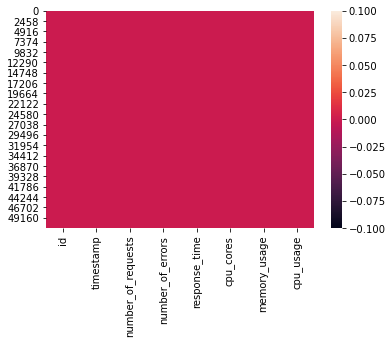

In [2]:
#df.isnull().sum().sum()
cols = df.columns[:8]
sns.heatmap(pd.isna(df[cols])) #recheck this later (should be right)


## 3. Data exploration

This may be one of the most important steps in your analysis. Your objective is to explore patterns in the data that will later drive your decisions about the suitable prediction model. You can read more about this step here: https://en.wikipedia.org/wiki/Data_exploration.

There are many visualization libraries in python which can help you visualize and better understand the relationships between the data. Some of the most used ones are `matplotlib` (https://matplotlib.org/) and `seaborn` (https://seaborn.pydata.org/)

At the end of this step, you should be able to make some important decisions. For example, will you include all features, or only a subset? Will you create new features? How will you treat your target variable? Will you need to encode the data in a different way?

In [3]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
cols = df.columns[2:8]
df_norm = min_max_scaler.fit_transform(df[cols])
df_norm = pd.DataFrame(df_norm)
df_norm #min-max normalized dataset

,0,1,2,3,4,5
0,0.195203,0.000000,0.876610,0.666667,0.347604,0.484986
1,0.199384,0.002286,0.885793,0.666667,0.756430,0.533553
2,0.104223,0.001143,0.832988,0.666667,0.698484,0.465731
3,0.147252,0.001143,0.875048,0.666667,0.137348,0.466245
4,0.193383,0.000000,0.900745,0.666667,0.157932,0.494553
...,...,...,...,...,...,...
51596,0.186101,0.002286,0.854805,0.666667,0.614508,0.516841
51597,0.118926,0.001143,0.854677,0.666667,0.209692,0.475718
51598,0.139211,0.001143,0.878143,0.666667,0.707411,0.475859
51599,0.165516,0.000000,0.853385,0.666667,0.887705,0.481782


In [65]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()

df_train, df_test = train_test_split(df_norm, 
                                     train_size = 0.6, 
                                     test_size = 0.4, 
                                     random_state = 10)

train_inp = df_train.columns[2:7]
train_out = df_train.columns[5]

fs = SelectKBest(score_func=f_regression, k=4)

df_train_inp = fs.fit_transform(df_train[train_inp],df_train[train_out]) #best features of df train input
#mask = fs.get_support()
#new_features = (df[df.columns[2:8]])[mask]

In [85]:


val_inp = df_test.columns[2:7]
val_out = df_test.columns[5]

LR.fit(df_train_inp,df_train[train_out])

y_train_prediction = LR.predict(df_test[val_inp])
print(np.sqrt(metrics.mean_squared_error(y_train_prediction, df_test[val_out])))


1.2316243074267738e-16


In [86]:
df_test[val_inp]

,2,3,4,5
41407,0.678004,0.000000,0.419650,0.472485
18146,0.610939,0.000000,0.148059,0.466090
15219,0.641398,0.000000,0.045327,0.469016
14802,0.906860,1.000000,0.938970,0.516597
460,0.887440,0.666667,0.754575,0.477164
...,...,...,...,...
12917,0.939435,1.000000,0.713771,0.467319
21956,0.648148,0.000000,0.492645,0.468368
7532,0.512112,0.000000,0.192028,0.457068
40366,0.671079,0.000000,0.494369,0.473687


## 4. Data Modeling and Validation

At this point, you should have an idea about your data. That means you are ready for the modeling part. Based on your exploration, you should choose the right type of the model. Since we are operating in a supervised domain (e.g. we know what we want to predict), your main decision should be whether to use a classification, regression or time-series type model.

Scikit-learn (https://scikit-learn.org/stable/index.html) is very broad library for machine learning practitioners. The documentation provides examples for different machine learning problems. Feel free to check it out before you choose your final implementation. If you are not sure which model will work best, you can also train multiple models and choose the best among them.

Do not forget that you need to validate your model. Especially if you train multiple models that you wish to choose from. There are more ways to do the validation (read more here: https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) but remember that your final solution will be evaluated based on RMSE metric.

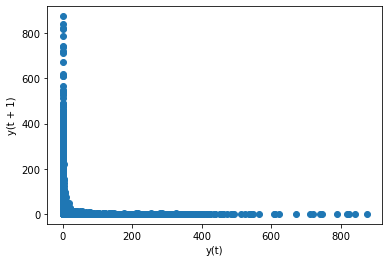

In [11]:
from pandas.plotting import lag_plot
a = df.columns[3] #dependecy on time
lag_plot(df[a])
plt.show()  #doesnt really depend on time

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
scores = cross_val_score(LR,df_test[val_inp],df_test[val_out], scoring='r2', cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


## 5. Prediction

Well done! You are almost finished with the assignment. In this last step you want to use a `predict` method on the data from `test.csv` file. Remember, any transformation or data preprocessing steps you did need to be done on this dataset too.

In [136]:
prac = pd.read_csv("./data/test.csv")
cols = prac.loc[:,['number_of_requests', 'number_of_errors', 'response_time', 'cpu_cores']]
cols = min_max_scaler.fit_transform(cols)
result = LR.predict(cols)
result


array([0.66666667, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
       0.66666667])

<div align="center"> Well done! </div>
You have completed all the steps necessary for the assignment. Don't forget to submit your solution according to instructions.
We hope you have enjoyed this and we thank you for your time.